In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_targets = pd.read_parquet('/Users/petterdalhaug/Documents/GitHub/data_analysis/analysis/data/C/train_targets.parquet')
X_train_observed = pd.read_parquet('/Users/petterdalhaug/Documents/GitHub/data_analysis/analysis/data/C/X_train_observed.parquet')
X_train_estimated = pd.read_parquet('/Users/petterdalhaug/Documents/GitHub/data_analysis/analysis/data/C/X_train_estimated.parquet')

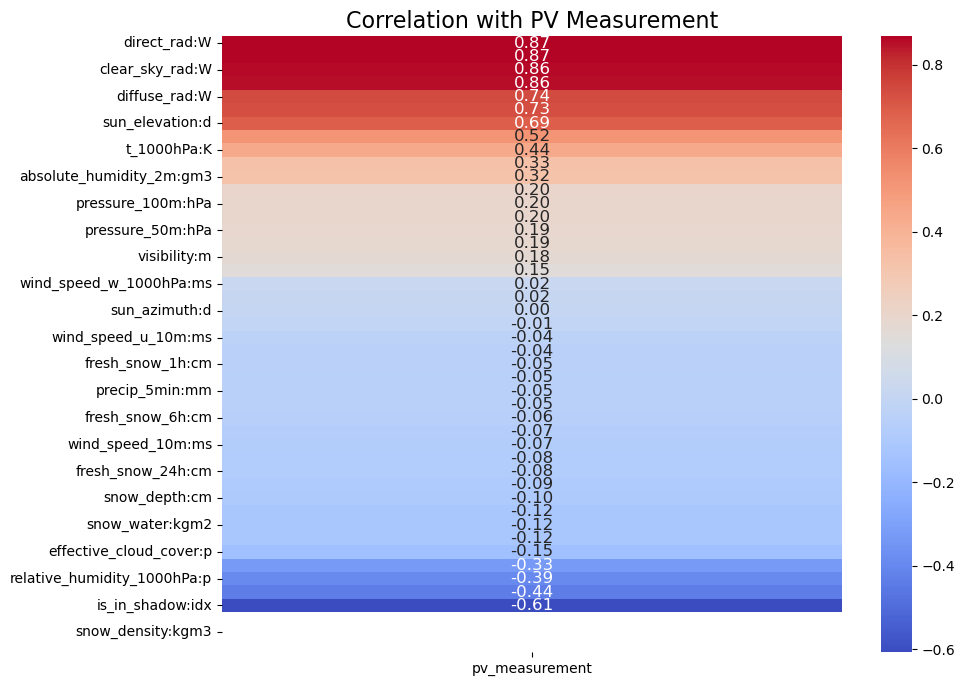

In [2]:
# Rename Columns
train_targets.rename(columns={'time': 'date_forecast'}, inplace=True)

# Align Time Intervals
X_train_observed_1hr = X_train_observed.groupby(pd.Grouper(key='date_forecast', freq='1H')).mean()

# Merge DataFrames
real_data = pd.merge(train_targets, X_train_observed_1hr.reset_index(), on='date_forecast')

# To fill NaN values with the mean
# Exclude constant features from the data before calculating correlation
filtered_real_data = real_data.drop(columns=[])

# Recalculate the correlation matrix
real_corr = filtered_real_data.corr()

# Filter to only include correlation with 'pv_measurement' and sort it
real_corr_with_target = real_corr[['pv_measurement']].sort_values(by='pv_measurement', ascending=False)

# Remove the 'pv_measurement' row to exclude the correlation of the target with itself
real_corr_with_target = real_corr_with_target.drop(index='pv_measurement')
# print(real_corr_with_target)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(real_corr_with_target, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title("Correlation with PV Measurement", fontsize=16)
plt.show()

In [3]:
# Filter rows where the absolute value of correlation is greater than 0.5
filtered_corr = real_corr_with_target[real_corr_with_target['pv_measurement'].abs() > 0.5]

# Sort the filtered DataFrame by 'pv_measurement' in ascending order (not in absolute values)
sorted_filtered_corr = filtered_corr.sort_values(by='pv_measurement', ascending=True)

# Now, sorted_filtered_corr contains the correlations you're interested in
print(sorted_filtered_corr)

                       pv_measurement
is_in_shadow:idx            -0.607165
is_day:idx                   0.522259
sun_elevation:d              0.687416
diffuse_rad_1h:J             0.733370
diffuse_rad:W                0.735928
clear_sky_energy_1h:J        0.855531
clear_sky_rad:W              0.860926
direct_rad_1h:J              0.866061
direct_rad:W                 0.868412


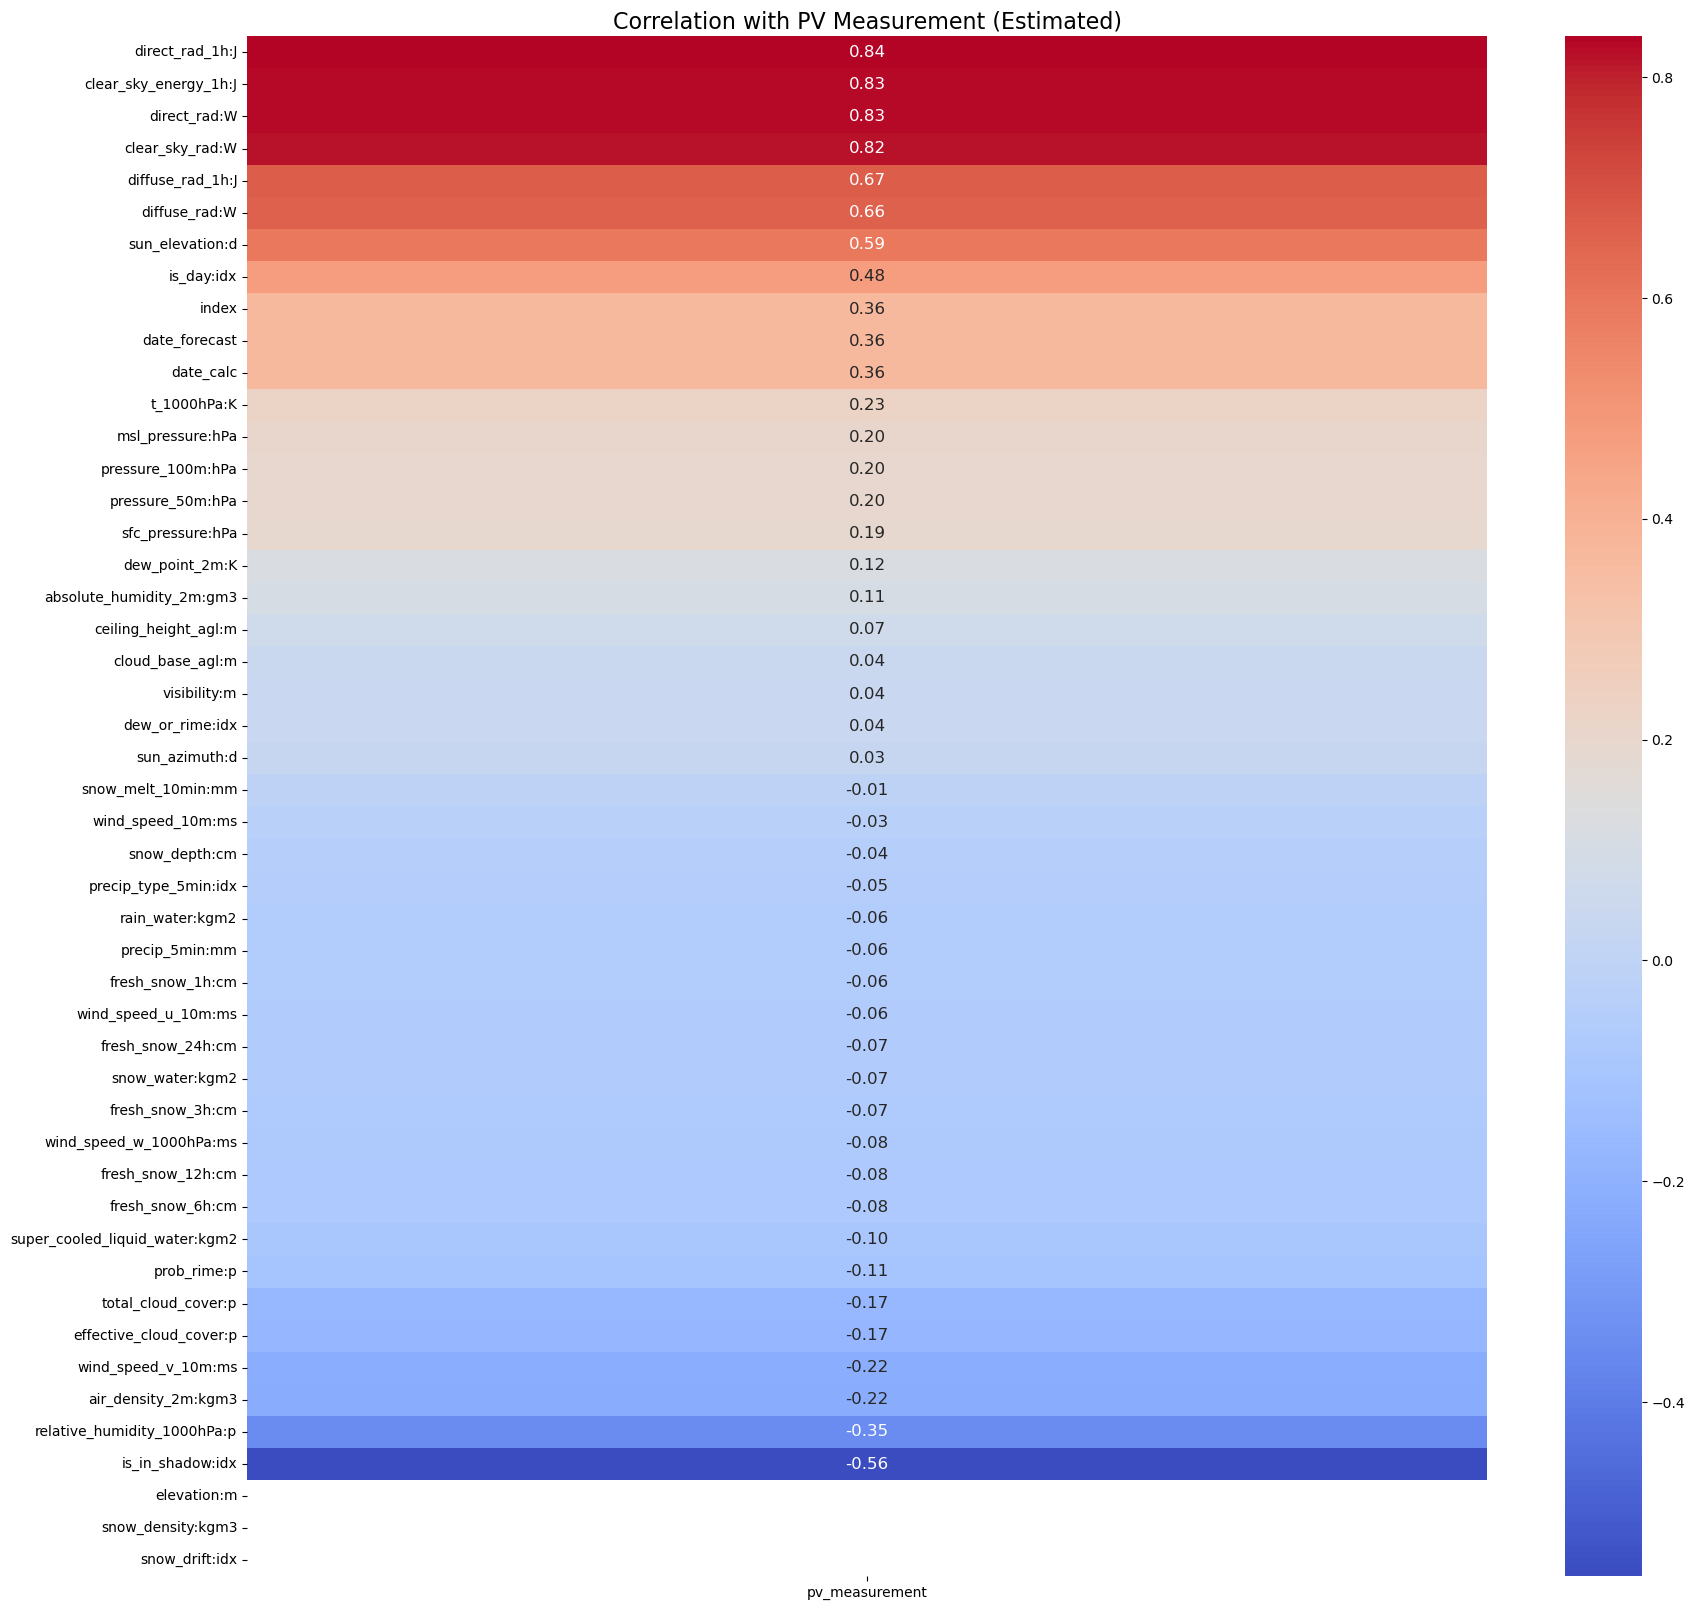

In [4]:
# If x_train_estimated has a 'date_forecast' field and needs to be grouped
# X_train_estimated_1hr = x_train_estimated.groupby(pd.Grouper(key='date_forecast', freq='1H')).mean()

# Merge DataFrames
estimated_data = pd.merge(train_targets, X_train_estimated.reset_index(), on='date_forecast')  # Make sure to reset the index

estimated_data.drop(columns=[], inplace=True)
# Calculate Correlation
estimated_corr = estimated_data.corr()

# Filter to only include correlation with 'pv_measurement'
estimated_corr_with_target = estimated_corr[['pv_measurement']].sort_values(by='pv_measurement', ascending=False)
estimated_corr_with_target = estimated_corr_with_target.drop(index='pv_measurement')

# print(estimated_corr_with_target)


# Plot Heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(estimated_corr_with_target, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title("Correlation with PV Measurement (Estimated)", fontsize=16)
plt.show()

In [5]:
# Filter rows where the absolute value of correlation is greater than 0.5
filtered_corr = estimated_corr_with_target[estimated_corr_with_target['pv_measurement'].abs() > 0.5]

# Sort the filtered DataFrame by 'pv_measurement' in ascending order (not in absolute values)
sorted_filtered_corr = filtered_corr.sort_values(by='pv_measurement', ascending=True)

# Now, sorted_filtered_corr contains the correlations you're interested in
print(sorted_filtered_corr)

                       pv_measurement
is_in_shadow:idx            -0.557879
sun_elevation:d              0.594574
diffuse_rad:W                0.659043
diffuse_rad_1h:J             0.673282
clear_sky_rad:W              0.816881
direct_rad:W                 0.826789
clear_sky_energy_1h:J        0.828625
direct_rad_1h:J              0.837093
